In [384]:
####################################################################
#Trabalho 2
#Gabriel Busquim e Livia Aloise
####################################################################


In [385]:
#Leitura do arquivo com a base de dados
import pandas as pd

arquivo = "car.txt"
df = pandas.DataFrame(pandas.read_csv(arquivo, sep=","))
df.head()


,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


0    1210
1     384
2      69
3      65
Name: class, dtype: int64


C:\Users\gbtat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


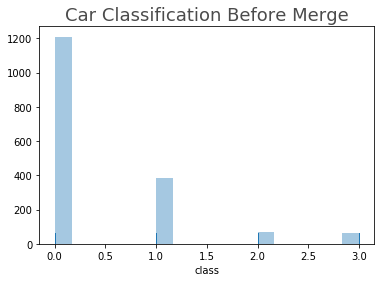

In [386]:
#Se grafico nao aparecer, executar célula novamente
import seaborn as sns
import matplotlib.pyplot as plt


#Mostrando a quantidade de cada classificacao dentro do dataset
df['class'].replace(("unacc", "acc", "good", "vgood"), (0,1,2,3), inplace=True)


counts = df["class"].value_counts()
print(counts)

graph = sns.distplot(df["class"], kde=False, rug=True);
graph.axes.set_title('Car Classification Before Merge', fontsize=18, alpha=0.7)
plt.savefig('CarClassificationBeforeMerge.png',dpi=300, bbox_inches='tight')


#convertendo o dataset para formato original
df['class'].replace((0,1,2,3),("unacc", "acc", "good", "vgood"), inplace=True)


In [387]:
#Conversao de dados categoricos em dados continuos -> uso de colunas Dummy
df=pd.get_dummies(df)
df.head()

,buyingPrice_high,buyingPrice_low,buyingPrice_med,buyingPrice_vhigh,maintPrice_high,maintPrice_low,maintPrice_med,maintPrice_vhigh,numDoors_2,numDoors_3,...,spaceLuggage_big,spaceLuggage_med,spaceLuggage_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [388]:
#criando uma única coluna que será alvo da predição (indica se o carro em questão é ruim ou não)

import numpy as np

df["badOrNotBad"]= np.zeros(df.shape[0],dtype=int)

for index, row in df.iterrows():
    if(row["class_acc"]==1 or row["class_good"]==1 or row["class_vgood"]==1):
        df.at[index, 'badOrNotBad'] = 1
    else:
        df.at[index, 'badOrNotBad'] = 0
        
#retirando colunas que não serão mais usadas
df = df.drop(["class_acc", "class_good", "class_vgood","class_unacc"], axis=1)

df.head()

,buyingPrice_high,buyingPrice_low,buyingPrice_med,buyingPrice_vhigh,maintPrice_high,maintPrice_low,maintPrice_med,maintPrice_vhigh,numDoors_2,numDoors_3,...,numPersons_2,numPersons_4,numPersons_more,spaceLuggage_big,spaceLuggage_med,spaceLuggage_small,safety_high,safety_low,safety_med,badOrNotBad
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


0    1210
1     518
Name: badOrNotBad, dtype: int64


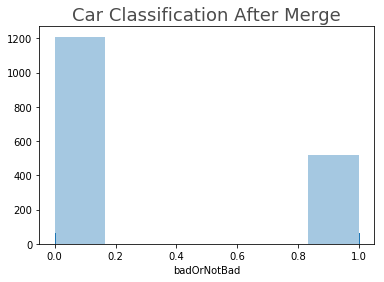

In [389]:
#Resultado após a junção


counts = df["badOrNotBad"].value_counts()
print(counts)

graph = sns.distplot(df["badOrNotBad"], kde=False, rug=True);
graph.axes.set_title('Car Classification After Merge', fontsize=18, alpha=0.7)
plt.savefig('CarClassificationAfterMerge.png',dpi=300, bbox_inches='tight')

In [390]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import time

#função que implementa o algoritmo KNN
def executeKNN(outputFeatures,inputFeatures, dataset,numNeighbors,testSize,trainSize):  
    
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    
    #separacao entre conjunto de treino e teste -> uso de um seed fixo para a separação sempre ser a mesma, garantindo sempre o mesmo resultado
    inputTrain, inputTest,outputTrain,outputTest = train_test_split(inputData, outputData, test_size=testSize,train_size=trainSize,random_state=np.random.seed(1000))
    
    knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=numNeighbors, weights="distance")
    #instanciação do timer
    start = time.time()
                                                              
    #Treino do conjunto
    knnClassifier = knnClassifier.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
      
    start = time.time()
    #Classificação para um exemplo desconhecido
    knnClassifier.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = end - start

    # Prevendo as classificações para o conjunto de teste
    predictionResult = knnClassifier.predict(inputTest)

    return predictionResult,outputTest,trainingTime,examplePredictionTime
 

In [391]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#função que implementa a arvore de decisão
def executeDecisionTree(outputFeatures, inputFeatures,dataset,testSize,trainSize):
    
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    
    #separacao entre conjunto de treino e teste -> uso de um seed fixo para a separação sempre ser a mesma, garantindo sempre o mesmo resultado
    inputTrain, inputTest,outputTrain,outputTest = train_test_split(inputData, outputData, test_size=testSize,train_size=trainSize,random_state=np.random.seed(1000))
    decisionTree = tree.DecisionTreeClassifier(random_state=np.random.seed(1000))
    
    #instanciação do timer
    start = time.time()
    #Treino do conjunto
    decisionTree = decisionTree.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
  
    start = time.time()
    #Classificação para um exemplo desconhecido
    decisionTree.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = end - start

    # Prevendo as classificações para o conjunto de teste
    predictionResult = decisionTree.predict(inputTest)

    return predictionResult,outputTest,trainingTime,examplePredictionTime,decisionTree


In [392]:
#Escolha dos melhores atributos



#Primeira parte: Gerando uma pontuação para cada atributo atual do dataset
import collections
from sklearn import metrics
import math
from sklearn.feature_selection import SelectKBest

features = list(df.columns)[:-1]
inx = 0
scoreByFeature = {}
predictionFeature =  "badOrNotBad"


inputFeatures = np.array(df[features])
outputFeatures = np.array(df[predictionFeature])

bestFeatures = SelectKBest(k='all')
fit = bestFeatures.fit(inputFeatures,outputFeatures)
for score in fit.scores_:
    scoreByFeature[score] = features[inx]
    inx += 1    
scoreByFeature = collections.OrderedDict(reversed(sorted(scoreByFeature.items())))

print("7 maiores pontuações de atributos:")
cont = 0
for score in scoreByFeature:
    print("Atributo: " + str(scoreByFeature[score]))
    print("Pontuação: " + str(score))
    if(cont ==6):
        break
    cont=cont +1
    print ("\n")





7 maiores pontuações de atributos:
Atributo: safety_low
Pontuação: 470.06726


Atributo: safety_high
Pontuação: 223.37163


Atributo: numPersons_4
Pontuação: 109.95582


Atributo: numPersons_more
Pontuação: 86.061195


Atributo: maintPrice_vhigh
Pontuação: 49.963547


Atributo: buyingPrice_low
Pontuação: 29.581781


Atributo: spaceLuggage_small
Pontuação: 27.415512


In [393]:
#Escolha dos melhores atributos

#Segunda parte: Adicionando progressivamente cada atributo e verificando a acurácia

attributeGroups = {"safety":['safety_high', 'safety_low', 'safety_med'],
                   "numPersons":['numPersons_2', 'numPersons_4', 'numPersons_more'],
                   "maintPrice":['maintPrice_high', 'maintPrice_low', 'maintPrice_med', 'maintPrice_vhigh'],
                   "buyingPrice":['buyingPrice_high', 'buyingPrice_low', 'buyingPrice_med', 'buyingPrice_vhigh'],
                   "spaceLuggage":['spaceLuggage_big', 'spaceLuggage_med', 'spaceLuggage_small'],
                   "numDoors":['numDoors_2', 'numDoors_3', 'numDoors_4', 'numDoors_5more']}


currentAttributeGroup = []
currentAttributeNames = []
for attr in attributeGroups:
    currentAttributeGroup = currentAttributeGroup + attributeGroups[attr]
    currentAttributeNames.append(attr)
    
    print("Conjunto de atributos: "+str(currentAttributeNames))
    resultPrediction,correctPrediction,_,_,_ = executeDecisionTree(predictionFeature, currentAttributeGroup, 
                                                                           df,0.3,0.7)
    accuracyDecisionTree = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para a Árvore de Decisão: " + str(accuracyDecisionTree))

    resultPrediction, correctPrediction,_,_ = executeKNN(predictionFeature,currentAttributeGroup, 
                                                                   df,5,0.3,0.7)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")

Conjunto de atributos: ['safety']
Acurácia para a Árvore de Decisão: 0.7032755298651252
Acurácia para o KNN: 0.7032755298651252


Conjunto de atributos: ['safety', 'numPersons']
Acurácia para a Árvore de Decisão: 0.8535645472061657
Acurácia para o KNN: 0.8400770712909441


Conjunto de atributos: ['safety', 'numPersons', 'maintPrice']
Acurácia para a Árvore de Decisão: 0.8728323699421965
Acurácia para o KNN: 0.8458574181117534


Conjunto de atributos: ['safety', 'numPersons', 'maintPrice', 'buyingPrice']
Acurácia para a Árvore de Decisão: 0.9190751445086706
Acurácia para o KNN: 0.9248554913294798


Conjunto de atributos: ['safety', 'numPersons', 'maintPrice', 'buyingPrice', 'spaceLuggage']
Acurácia para a Árvore de Decisão: 0.9479768786127167
Acurácia para o KNN: 0.9479768786127167


Conjunto de atributos: ['safety', 'numPersons', 'maintPrice', 'buyingPrice', 'spaceLuggage', 'numDoors']
Acurácia para a Árvore de Decisão: 0.9865125240847784
Acurácia para o KNN: 0.9364161849710982




In [394]:
chosenFeatures = currentAttributeGroup
predictionFeature =  "badOrNotBad"

In [395]:
#Escolha do melhor tamanho para o conjunto de treinamento/testes

possibleTrainingSizes = [0.5,0.55,0.6,0.65,0.7]

for possibleSize in possibleTrainingSizes:
    print("Tamanho: " + str(round(possibleSize*100)) +"% para treino e " + str(round((1-possibleSize)*100)) + "% para teste." )
    resultPrediction,correctPrediction,_,_,_ = executeDecisionTree(predictionFeature, chosenFeatures, 
                                                                                   df,1-possibleSize,possibleSize)
    accuracyDecisionTree = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para a Árvore de Decisão: " + str(accuracyDecisionTree))

    resultPrediction, correctPrediction,_,_ = executeKNN(predictionFeature, chosenFeatures, 
                                                         df,5,1-possibleSize,possibleSize)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")
    

Tamanho: 50% para treino e 50% para teste.
Acurácia para a Árvore de Decisão: 0.9675925925925926
Acurácia para o KNN: 0.9409722222222222


Tamanho: 55% para treino e 45% para teste.
Acurácia para a Árvore de Decisão: 0.974293059125964
Acurácia para o KNN: 0.9434447300771208


Tamanho: 60% para treino e 40% para teste.
Acurácia para a Árvore de Decisão: 0.9783236994219653
Acurácia para o KNN: 0.9378612716763006


Tamanho: 65% para treino e 35% para teste.
Acurácia para a Árvore de Decisão: 0.9818181818181818
Acurácia para o KNN: 0.9371900826446281


Tamanho: 70% para treino e 30% para teste.
Acurácia para a Árvore de Decisão: 0.9865125240847784
Acurácia para o KNN: 0.9364161849710982




In [396]:
bestTrainingSetSize = 0.7
bestTestSetSize = 0.3

In [397]:
#Escolha do melhor número de vizinhos para o método KNN

possibleNeighbourNumbers = [1,3,5,7,9,11]

for possibleNeighbourNumber in possibleNeighbourNumbers:
    print("Número de vizinhos: "+str(possibleNeighbourNumber))
    resultPrediction, correctPrediction,_,_= executeKNN(predictionFeature, chosenFeatures, df,
                                                         possibleNeighbourNumber,bestTestSetSize,bestTrainingSetSize)
    accuracyKNN = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction, normalize=True)
    print("Acurácia para o KNN: " + str(accuracyKNN))
    print("\n")
    
    

Número de vizinhos: 1
Acurácia para o KNN: 0.7861271676300579


Número de vizinhos: 3
Acurácia para o KNN: 0.9132947976878613


Número de vizinhos: 5
Acurácia para o KNN: 0.9364161849710982


Número de vizinhos: 7
Acurácia para o KNN: 0.9479768786127167


Número de vizinhos: 9
Acurácia para o KNN: 0.9633911368015414


Número de vizinhos: 11
Acurácia para o KNN: 0.9614643545279383




In [398]:
bestNumberOfNeighbours = 9

In [399]:
#Métricas de Avaliação: Acurácia, Sensibilidade(recall) e Precisão
from sklearn import metrics

def calculateMetrics(resultPrediction,correctPrediction):
    precision = metrics.precision_score(y_true=correctPrediction, y_pred=resultPrediction)
    recall = metrics.recall_score(y_true=correctPrediction, y_pred=resultPrediction)
    accuracy = metrics.accuracy_score(y_true=correctPrediction, y_pred=resultPrediction)
    return accuracy,recall,precision

In [400]:
#função que desenha a matriz de confusão -> retirada da Internet e adaptada para o uso do dataset em questão

from sklearn.metrics import confusion_matrix

def plotConfusionMatrix(y_true, y_pred, classes, normalize=False,title=None,map=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ["Bad","Not Bad"]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)









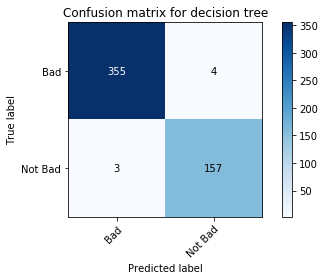

Acurácia : 0.9865125240847784
Precisão : 0.9751552795031055
Recall : 0.98125
Tempo levado pelo treinamento: 0.0029752254486083984s
Tempo para um exemplo qualquer: 0.0s


In [401]:
#Resultados para a árvore de decisão 

resultPrediction, correctPrediction, trainingTime,examplePredictionTime,decisionTree = executeDecisionTree(predictionFeature, chosenFeatures, 
                                                                                   df,bestTestSetSize,bestTrainingSetSize)
accuracy,recall,precision=calculateMetrics(resultPrediction, correctPrediction)

possibleClassifications= range(0,2)

plot_confusion_matrix(correctPrediction, resultPrediction, possibleClassifications,normalize=False,
                      title='Confusion matrix for decision tree')
plt.show()

print("Acurácia : " + str(accuracy))
print("Precisão : " + str(precision))
print("Recall : " + str(recall))
print("Tempo levado pelo treinamento: " + str(trainingTime) + "s")
print("Tempo para um exemplo qualquer: " + str(examplePredictionTime) + "s")

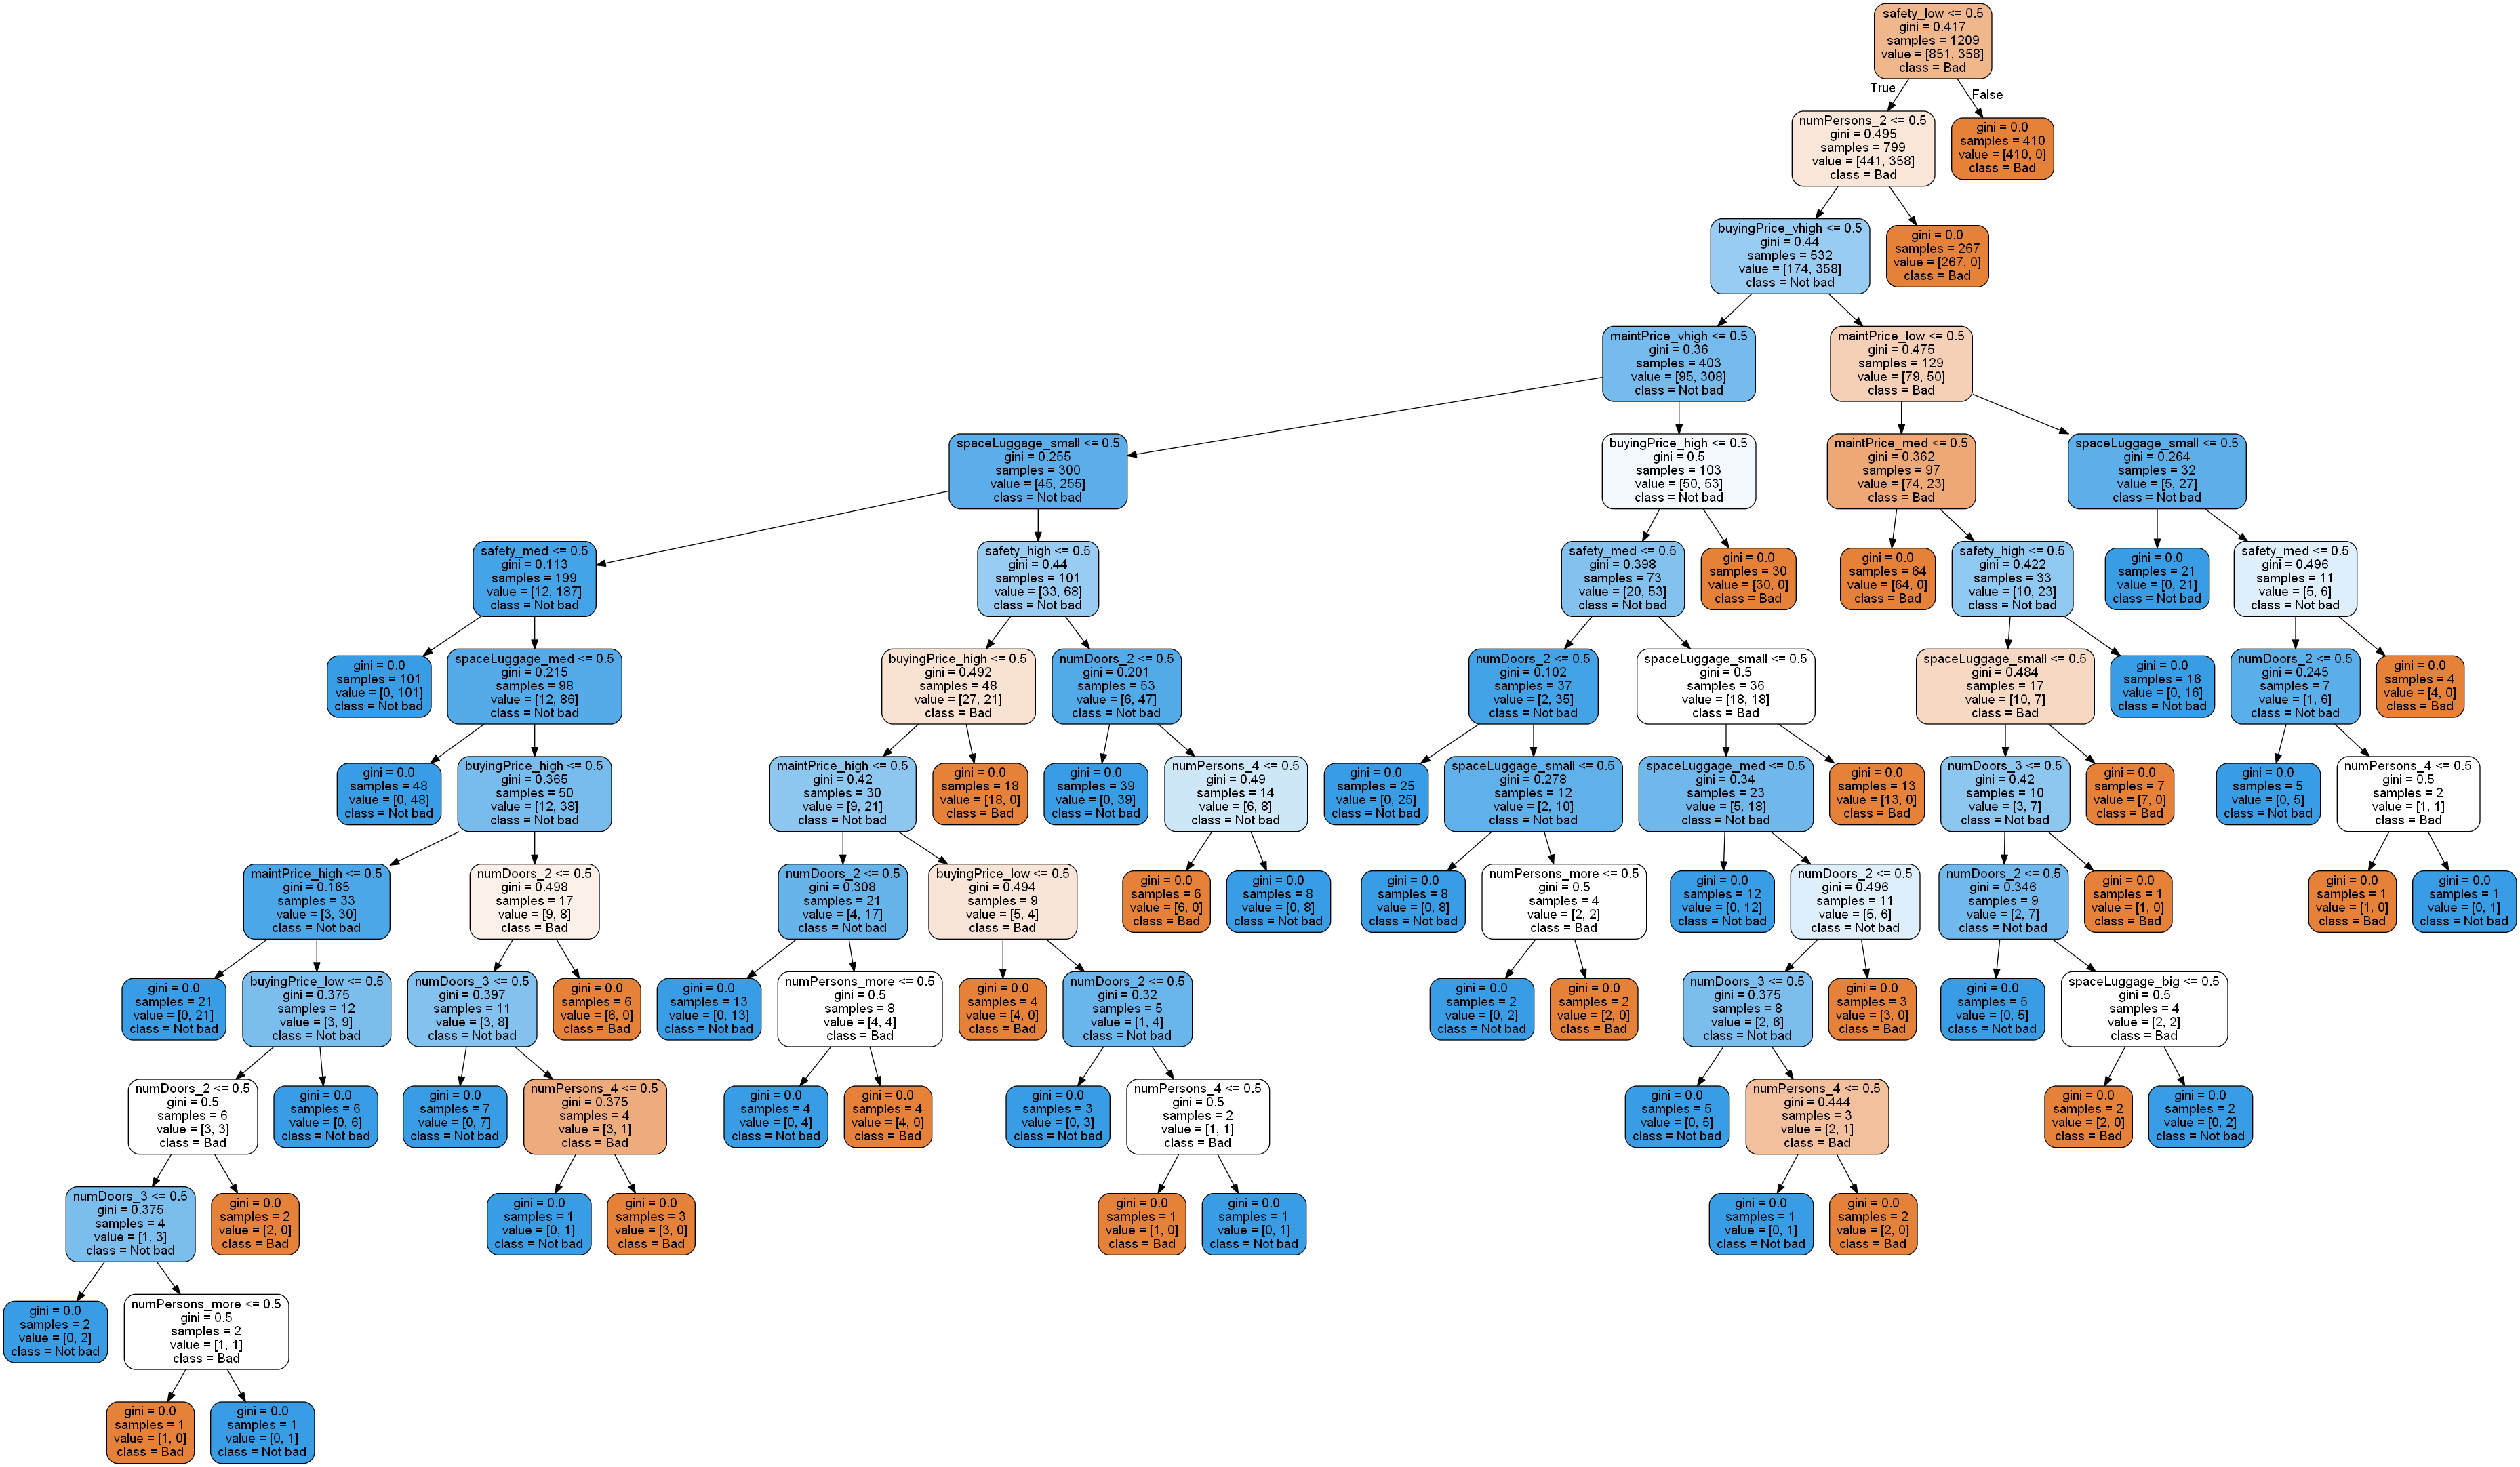

In [402]:
#desenhando arvore de decisao

import os
import pydotplus
from IPython.display import Image

possibleClassifications= range(0,2)
#necessario passar o arquivo para executar funcao que desenha a arvore
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

target_labels = []
for classification in target_classifications:
    if(classification == 0):
        target_labels.append('Bad')
    elif(classification == 1):
        target_labels.append('Not bad')

dot_data = tree.export_graphviz(decisionTree,feature_names=chosenFeatures, class_names=target_labels,out_file=None,
                                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('DecisionTreeMap.png')


Image("DecisionTreeMap.png")

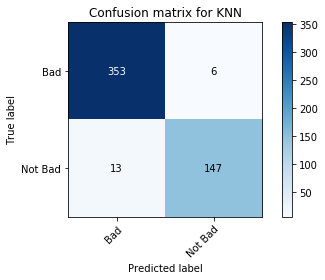

Acurácia : 0.9633911368015414
Precisão : 0.9607843137254902
Recall : 0.91875
Tempo levado pelo treinamento: 0.0059757232666015625s
Tempo para um exemplo qualquer: 0.0018649101257324219s


In [403]:
#Resultados para o KNN

resultPrediction, correctPrediction, trainingTime,examplePredictionTime = executeKNN(predictionFeature, chosenFeatures, 
                                                                df,bestNumberOfNeighbours,bestTestSetSize,bestTrainingSetSize)
accuracy,recall,precision=calculateMetrics(resultPrediction, correctPrediction)


possibleClassifications= range(0,2)

plot_confusion_matrix(correctPrediction, resultPrediction, possibleClassifications,normalize=False,
                      title='Confusion matrix for KNN')
plt.show()

print("Acurácia : " + str(accuracy))
print("Precisão : " + str(precision))
print("Recall : " + str(recall))
print("Tempo levado pelo treinamento: " + str(trainingTime) + "s")
print("Tempo para um exemplo qualquer: " + str(examplePredictionTime) + "s")



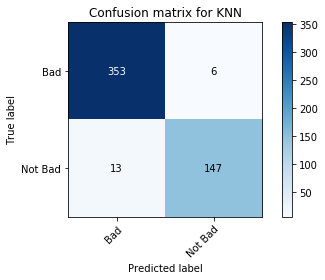

In [404]:
plot_confusion_matrix(correctPrediction, resultPrediction, target_classifications,normalize=False,
                      title='Confusion matrix for KNN')


plt.show()

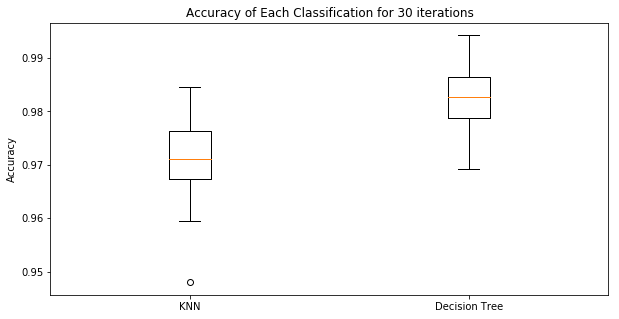

In [405]:
# Comparacao dos metodos -> Rodando ambos os métodos 50 vezes para diferentes combinações de conjuntos de teste e treino
# (de mesmo tamanho) e gerando um gráfico boxplot

accuracyPerMethod=np.zeros((50, 2))
X = np.array(df[chosenFeatures])
Y = np.array(df[predictionFeature])

for i in range(0,50):    
    inputTrain, inputTest,outputTrain,outputTest = train_test_split(X, Y, test_size=bestTestSetSize,
                                                        train_size=bestTrainingSetSize,random_state=np.random.seed(i*20 +30))

    #Pegando acurácia para o KNN   
    knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=bestNumberOfNeighbours, weights="distance") 
    knnClassifier.fit(inputTrain,outputTrain)
    result=knnClassifier.predict(inputTest)
    accuracyPerMethod[i][0] = metrics.accuracy_score(y_true=outputTest, y_pred=result)
    
    
    #Pegando acurácia para arovre de decisao
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(inputTrain,outputTrain)
    result=decisionTree.predict(inputTest)
    accuracyPerMethod[i][1] = metrics.accuracy_score(y_true=outputTest, y_pred=result)

    
plt.figure(figsize=(10,5))
plt.boxplot(accuracyPerMethod)

ax = plt.gca()
ax.set_xticklabels(['KNN', 'Decision Tree'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Classification for 30 iterations')
plt.savefig('BoxPlot.png',dpi=300, bbox_inches='tight')